In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from math import sqrt, ceil

# Módulos de ML
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
# Regresión logística
from sklearn.linear_model import LogisticRegression
# Árboles de decisión
from sklearn.tree import DecisionTreeClassifier
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
# Máquinas de vectores de soporte (SVM)
from sklearn.svm import SVC
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

data = fetch_ucirepo(id =73)
X = data.data.features 
y = data.data.targets 

df = pd.DataFrame(X, columns=data.data.feature_names)
df['target'] = y
df


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [3]:
df.describe()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


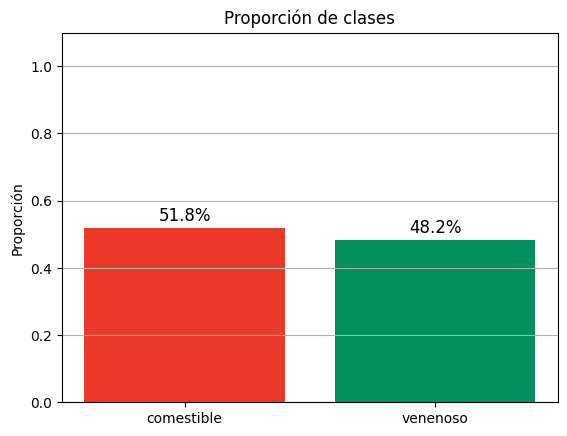

In [4]:
import matplotlib.pyplot as plt
label_map = {'p': 'venenoso', 'e': 'comestible'}
df_labels = df['target'].map(label_map)

# Calcular proporciones
counts = df_labels.value_counts()
proportions = counts / counts.sum()

# Crear gráfico
fig, ax = plt.subplots()
bars = ax.bar(proportions.index, proportions.values, color=['#EA3829', '#008F5D'])

# Agregar porcentajes sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01,
            f'{height:.1%}', ha='center', va='bottom', fontsize=12)

# Estética
ax.set_title('Proporción de clases')
ax.set_ylabel('Proporción')
plt.grid(axis='y')
plt.ylim(0, 1.1)
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [6]:
import numpy as np
df_missing = df.copy()
mask = np.random.rand(*df_missing.iloc[:, :-1].shape) < 0.05  
df_missing.iloc[:, :-1] = df_missing.iloc[:, :-1].mask(mask)

df_missing.describe()
df_missing.isnull().sum()

cap-shape                    370
cap-surface                  404
cap-color                    418
bruises                      414
odor                         411
gill-attachment              441
gill-spacing                 397
gill-size                    417
gill-color                   391
stalk-shape                  420
stalk-root                  2768
stalk-surface-above-ring     410
stalk-surface-below-ring     417
stalk-color-above-ring       407
stalk-color-below-ring       366
veil-type                    408
veil-color                   416
ring-number                  428
ring-type                    414
spore-print-color            411
population                   413
habitat                      397
target                         0
dtype: int64

In [7]:
df2 = df.iloc[:-2754].reset_index(drop=True)
df2.describe()



,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
count,5370,5370,5370,5370,5370,5370,5370,5370,5370,5370,...,5370,5370,5370,5370,5370,5370,5370,5370,5370,5370
unique,6,4,10,2,8,1,2,2,10,2,...,6,7,1,1,2,4,6,6,7,2
top,x,y,g,t,n,f,c,b,p,t,...,w,w,p,w,o,p,n,v,d,e
freq,2794,2147,1607,3020,2764,5370,4384,4593,1278,2787,...,2984,2940,5370,5370,5266,3226,1920,2017,2476,3514


In [8]:
from sklearn.preprocessing import LabelEncoder as Le
for col in df2.columns:
    encoder = Le()
    df2[col] = encoder.fit_transform(df2[col])


  

In [9]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(df2.iloc[:, :-1])  # Only scale features, not target

df_X = pd.DataFrame(X_standard, columns=df2.columns[:-1], index=df2.index)

df_X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,5.370000e+03,5.370000e+03,5.370000e+03,5.370000e+03,5.370000e+03,5370.0,5.370000e+03,5.370000e+03,5.370000e+03,5.370000e+03,...,5.370000e+03,5.370000e+03,5.370000e+03,5370.0,5370.0,5.370000e+03,5.370000e+03,5.370000e+03,5370.000000,5.370000e+03
mean,5.821952e-17,2.646342e-17,-2.117073e-16,4.234147e-17,5.292683e-17,0.0,2.117073e-17,-5.292683e-18,1.587805e-16,-4.234147e-17,...,-1.270244e-16,-4.234147e-17,-8.468293e-17,0.0,0.0,1.058537e-17,-5.821952e-17,-2.117073e-17,0.000000,-1.058537e-17
std,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,0.0,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,...,1.000093e+00,1.000093e+00,1.000093e+00,0.0,0.0,1.000093e+00,1.000093e+00,1.000093e+00,1.000093,1.000093e+00
min,-2.106463e+00,-1.187031e+00,-1.859153e+00,-1.133625e+00,-2.267309e+00,0.0,-4.742455e-01,-4.113034e-01,-2.320095e+00,-1.038739e+00,...,-2.348320e+00,-2.614566e+00,-2.589440e+00,0.0,0.0,-1.405323e-01,-1.992284e+00,-1.182614e+00,-2.691262,-7.422124e-01
25%,-8.956837e-01,-1.187031e+00,-7.276045e-01,-1.133625e+00,-8.063718e-01,0.0,-4.742455e-01,-4.113034e-01,-9.280619e-01,-1.038739e+00,...,-9.164499e-01,-6.311105e-01,-6.178970e-01,0.0,0.0,-1.405323e-01,-2.127489e-01,-2.708211e-01,-0.495676,-7.422124e-01
50%,9.204855e-01,2.909092e-01,-3.504218e-01,8.821257e-01,6.545650e-01,0.0,-4.742455e-01,-4.113034e-01,-1.785057e-01,9.627061e-01,...,5.154197e-01,6.911928e-01,6.964650e-01,0.0,0.0,-1.405323e-01,6.770188e-01,-2.708211e-01,0.236186,-1.352868e-01
75%,9.204855e-01,1.029879e+00,1.158309e+00,8.821257e-01,6.545650e-01,0.0,-4.742455e-01,-4.113034e-01,1.106448e+00,9.627061e-01,...,5.154197e-01,6.911928e-01,6.964650e-01,0.0,0.0,-1.405323e-01,6.770188e-01,6.409715e-01,0.968048,-1.352868e-01
max,9.204855e-01,1.029879e+00,1.535492e+00,8.821257e-01,2.845970e+00,0.0,2.108613e+00,2.431295e+00,1.534766e+00,9.627061e-01,...,1.947289e+00,6.911928e-01,1.353646e+00,0.0,0.0,7.115800e+00,6.770188e-01,3.376349e+00,0.968048,2.899341e+00


In [10]:
y = df2['target']

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, stratify=y, test_size=0.2, random_state=42)  

In [11]:
print(df2.head())

   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     5                0   
1          5            2          9        1     0                0   
2          0            2          8        1     3                0   
3          5            3          8        1     5                0   
4          5            2          3        0     4                0   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       5                       5          0           0   
1                       5                       5     

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor score de validación:", grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Mejor score de validación: 0.9358685482196115


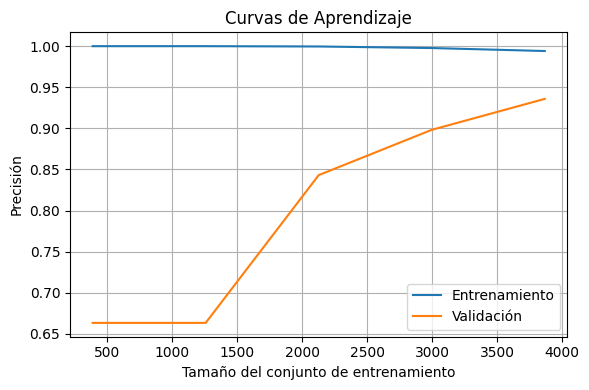

In [24]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    grid.best_estimator_, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_scores_mean, label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, label="Validación")
plt.title("Curvas de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("modelo1_learning_curve.png")
plt.show()

Matriz de confusión:
 [[352   0]
 [  3 182]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       352
           1       1.00      0.98      0.99       185

    accuracy                           0.99       537
   macro avg       1.00      0.99      0.99       537
weighted avg       0.99      0.99      0.99       537


Precisión total: 0.994413407821229


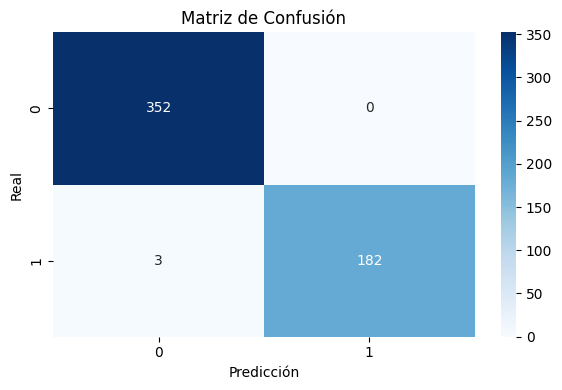

In [26]:
y_pred = grid.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nPrecisión total:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.savefig("modelo1_confusion_matrix.png")
plt.show()

In [27]:
log_reg = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor precisión en validación cruzada:", grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores hiperparámetros: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor precisión en validación cruzada: 0.9058718240229864


Matriz de confusión:
 [[346   6]
 [  9 176]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       352
           1       0.97      0.95      0.96       185

    accuracy                           0.97       537
   macro avg       0.97      0.97      0.97       537
weighted avg       0.97      0.97      0.97       537


Precisión total: 0.9720670391061452


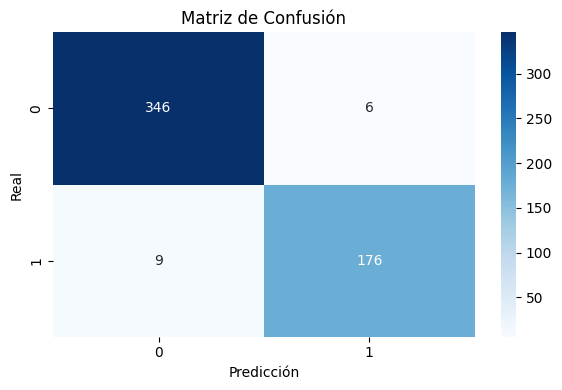

In [28]:
y_pred = best_log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nPrecisión total:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.savefig("modelo1_confusion_matrix.png")
plt.show()

c:\Users\matia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\matia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\matia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\matia\AppData\Local\Programs\Python\Python310\lib\site-packages\

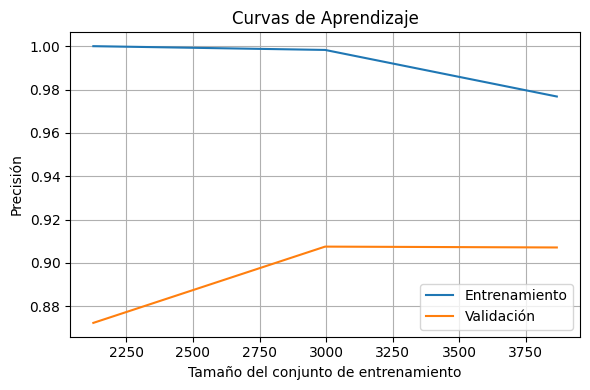

In [29]:
train_sizes, train_scores, test_scores = learning_curve(
    best_log_reg, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_scores_mean, label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, label="Validación")
plt.title("Curvas de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("modelo1_learning_curve.png")
plt.show()

In [16]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Benigno = 0, Maligno = 1
y_test_encoded = le.transform(y_test)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       703
           1       0.96      0.94      0.95       371

    accuracy                           0.97      1074
   macro avg       0.96      0.96      0.96      1074
weighted avg       0.97      0.97      0.97      1074



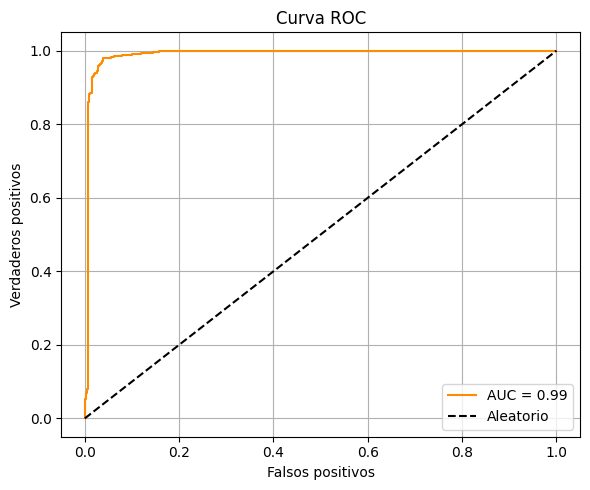

In [17]:
y_pred = clf_RL.predict(X_test)
print(classification_report(y_test, y_pred))

# Curva ROC
y_proba = clf_RL.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_proba)
auc = roc_auc_score(y_test_encoded, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

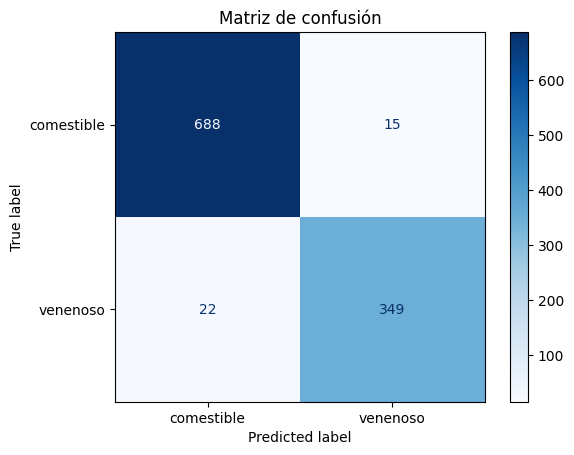

In [ ]:
sp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['comestible', 'venenoso'])

plt.figure(figsize=(5, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de confusión")
plt.grid(False)
plt.show()# Use integer labels since y_test and y_pred are integers (0 and 1)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Map display labels to class names for better readability
di

Precisión: 1.00 ± 0.00


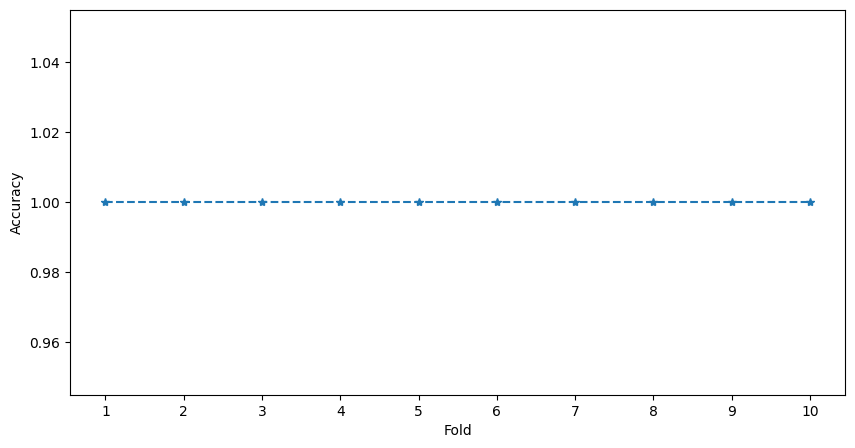

In [19]:
# Crear el objeto StratifiedKFold
splits = 10
folds = range(1,splits+1)
skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42)

X = pd.DataFrame(X_standard)
y = df2['target']

# Para almacenar los resultados
scores = []

# Validación cruzada manual
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

print(f"Precisión: {np.mean(scores):.2f} \u00B1 {np.std(scores):.2f}")
plt.figure(figsize=(10,5))
plt.plot(folds,scores,'--*')
plt.xticks(folds)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()